In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from src.datasets import load_iris
from src.model_selection import grid_search, score_zoom
from src.shadow_learn import ShadowedSetEstimator
from src.utils import create_logfile, log_last_execution
from src.plot import plot_shadowed_set

In [2]:
log = False

In [3]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
label_colors = ['cornflowerblue', 'mediumseagreen', 'crimson']

contourf_colors = ['white', 'pink', 'palevioletred', 'red']

In [4]:
estimator = ShadowedSetEstimator(solver='gurobi-two-phases')

# Shadow indifferent metric test

In [14]:
dataset_loader = lambda: load_iris(d=2, target='Iris-virginica')
C0_range = np.concatenate((np.logspace(-2, 1, 5), [0.1]))
C1_range = np.concatenate((np.logspace(-2, 1, 5), [0.1]))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), [16.6667]))
param_grid = {'C0': C0_range, 'C1': C1_range, 'sigma': sigma_range}

In [15]:
gs_res = grid_search(dataset_loader, estimator, 'shadow-indifferent', param_grid, scaled=True, log=log)

***** Split n. 0
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 300 tasks      | elapsed:   10.2s
[Parallel(n_jobs=2)]: Done 1500 tasks      | elapsed:   52.0s


mean_fit_time                                                     0.0749012
std_fit_time                                                     0.00589975
mean_score_time                                                  0.00419707
std_score_time                                                  0.000447257
param_estimator__C0                                                    0.01
param_estimator__C1                                                0.316228
param_estimator__sigma                                             0.316228
params                    {'estimator__C0': 0.01, 'estimator__C1': 0.316...
split0_test_score                                                         1
split1_test_score                                                         1
split2_test_score                                                         1
split3_test_score                                                         1
split4_test_score                                                         1
split5_test_

[Parallel(n_jobs=2)]: Done 2160 out of 2160 | elapsed:  1.3min finished


100%|##########| 97647/97647 [00:39<00:00, 2459.45it/s]
F:\Copia HD G\Universita\UNIMI\Th\PyCharm\shadowedSetLearn\src\plot.py:1072: UserWarning: No contour levels were found within the data range.
  out2 = ax.contour(xx, yy, Z, levels=contour_levels, linewidths=1, linestyles='dashed', colors=line_colors)


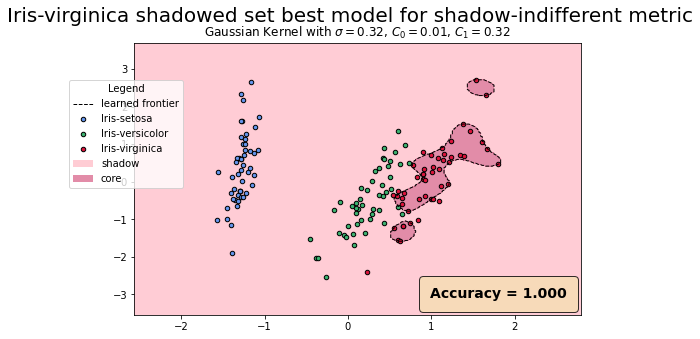

In [16]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors)

# Shadow half metric test

In [17]:
dataset_loader = lambda: load_iris(d=2, target='Iris-virginica')
C0_range = np.concatenate((np.logspace(-2, 1, 5), [0.7875]))
C1_range = np.concatenate((np.logspace(-2, 1, 5), [0.7875]))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), [1.18889]))
param_grid = {'C0': C0_range, 'C1': C1_range, 'sigma': sigma_range}

In [18]:
gs_res = grid_search(dataset_loader, estimator, 'shadow-half', param_grid, scaled=True, log=log)

***** Split n. 0
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 104 tasks      | elapsed:    7.4s
[Parallel(n_jobs=2)]: Done 704 tasks      | elapsed:   32.5s
[Parallel(n_jobs=2)]: Done 1704 tasks      | elapsed:  1.2min


mean_fit_time                                                     0.0733423
std_fit_time                                                     0.00331355
mean_score_time                                                  0.00444207
std_score_time                                                  0.000634323
param_estimator__C0                                                 1.77828
param_estimator__C1                                                 1.77828
param_estimator__sigma                                              1.18889
params                    {'estimator__C0': 1.7782794100389228, 'estimat...
split0_test_score                                                  0.909091
split1_test_score                                                  0.818182
split2_test_score                                                         1
split3_test_score                                                         1
split4_test_score                                                  0.909091
split5_test_

[Parallel(n_jobs=2)]: Done 2160 out of 2160 | elapsed:  1.5min finished


100%|##########| 97647/97647 [00:39<00:00, 2500.78it/s]


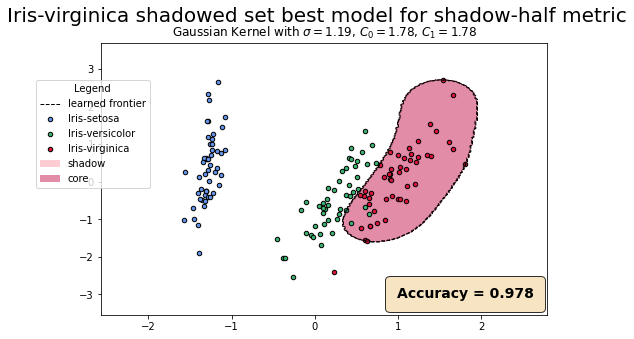

In [19]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors)

## Shadow half metric score zoom with fixed C0

In [20]:
C1_range = np.linspace(0.05, 3, 5)
sigma_range = np.linspace(0.1, 5, 10)
param_grid = {'C1': C1_range, 'sigma': sigma_range}

Fitting 10 folds for each of 66 candidates, totalling 660 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.5s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   15.4s


mean_fit_time                                                     0.0684705
std_fit_time                                                     0.00424613
mean_score_time                                                  0.00419688
std_score_time                                                  0.000878732
param_estimator__C1                                                  0.7875
param_estimator__sigma                                              1.18889
params                    {'estimator__C1': 0.7875000000000001, 'estimat...
split0_test_score                                                  0.909091
split1_test_score                                                  0.818182
split2_test_score                                                         1
split3_test_score                                                         1
split4_test_score                                                  0.909091
split5_test_score                                                         1
split6_test_

[Parallel(n_jobs=2)]: Done 660 out of 660 | elapsed:   25.6s finished


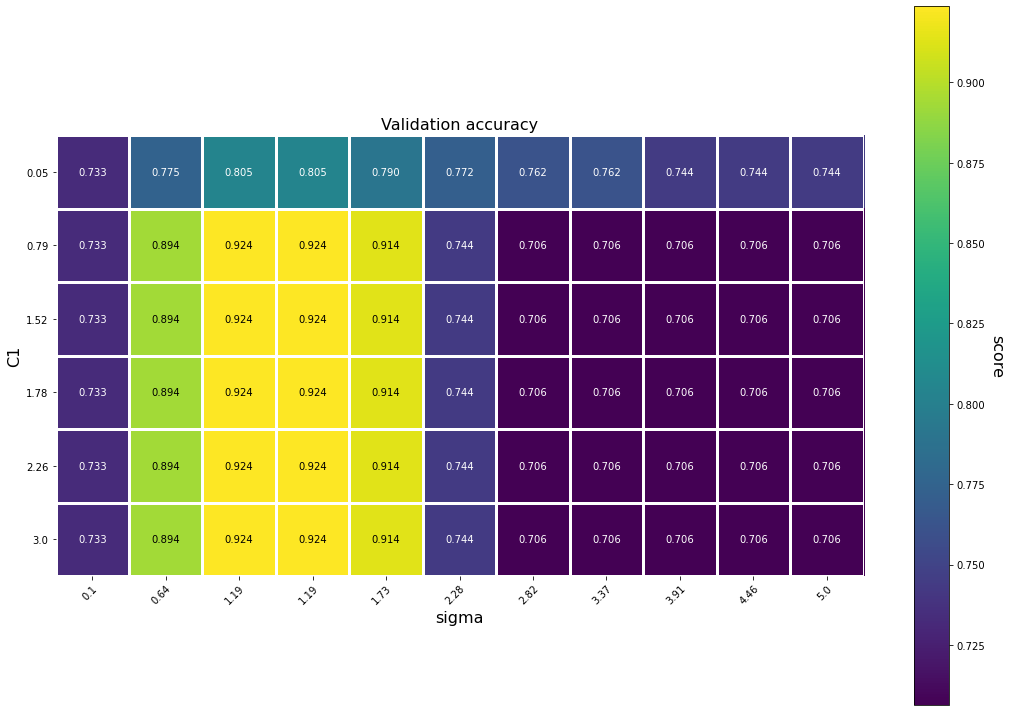

In [21]:
new_gs = score_zoom(gs_res, fixed=['C0'], param_grid=param_grid, plotly=True, log=log)

## Shadow half metric score zoom with fixed C1

In [22]:
C0_range = np.linspace(0.05, 3, 5)
sigma_range = np.linspace(0.1, 5, 10)
param_grid = {'C0': C0_range, 'sigma': sigma_range}

Fitting 10 folds for each of 66 candidates, totalling 660 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   14.8s


mean_fit_time                                                     0.0652157
std_fit_time                                                     0.00111736
mean_score_time                                                  0.00390375
std_score_time                                                  3.41363e-07
param_estimator__C0                                                  0.7875
param_estimator__sigma                                              1.18889
params                    {'estimator__C0': 0.7875000000000001, 'estimat...
split0_test_score                                                  0.909091
split1_test_score                                                  0.818182
split2_test_score                                                         1
split3_test_score                                                         1
split4_test_score                                                  0.909091
split5_test_score                                                         1
split6_test_

[Parallel(n_jobs=2)]: Done 660 out of 660 | elapsed:   25.1s finished


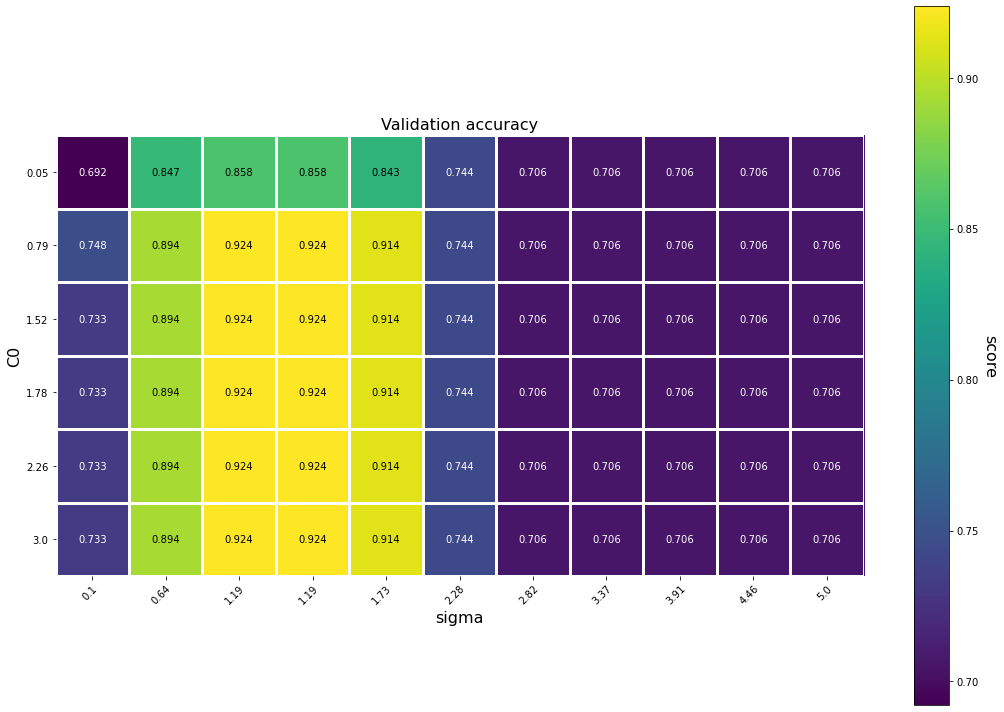

In [23]:
new_gs = score_zoom(gs_res, fixed=['C1'], param_grid=param_grid, plotly=True, log=log)